<a href="https://colab.research.google.com/github/Ghalia671/MODULE1/blob/master/Explication_1_0_0_r%C3%A9gression_lin%C3%A9aire_sur_apprentissage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Données


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
housing=pd.read_csv("https://dataks.bitbucket.io/ml/houses_poly.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
housing.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,price
0,0.322873,0.101295,-0.059028,-0.132865,-0.148188,-0.138416,-0.122455,-0.107645,-0.095827,-0.086876,-0.080186,-0.075159,-0.071334,-0.068376,-0.066047,-0.064183,-0.062666,-0.061410,-0.060354,-0.059452,-0.05867,-0.057981,-0.057367,-0.056812,-0.056304,-0.055834,-0.055396,-0.054983,-0.054592,-0.054219,420000
1,-0.531239,-0.513639,-0.418851,-0.311237,-0.227199,-0.171030,-0.135341,-0.112598,-0.097697,-0.087575,-0.080444,-0.075255,-0.071369,-0.068388,-0.066052,-0.064185,-0.062666,-0.061410,-0.060354,-0.059452,-0.05867,-0.057981,-0.057367,-0.056812,-0.056304,-0.055834,-0.055396,-0.054983,-0.054592,-0.054219,385000
2,-0.965221,-0.737589,-0.512233,-0.344044,-0.237446,-0.173998,-0.136160,-0.112817,-0.097755,-0.087590,-0.080448,-0.075256,-0.071370,-0.068388,-0.066052,-0.064185,-0.062666,-0.061410,-0.060354,-0.059452,-0.05867,-0.057981,-0.057367,-0.056812,-0.056304,-0.055834,-0.055396,-0.054983,-0.054592,-0.054219,495000
3,0.692219,0.438753,0.188984,0.020028,-0.064754,-0.096362,-0.102329,-0.098343,-0.091631,-0.085017,-0.079372,-0.074807,-0.071183,-0.068311,-0.066020,-0.064172,-0.062661,-0.061408,-0.060353,-0.059452,-0.05867,-0.057981,-0.057367,-0.056812,-0.056304,-0.055834,-0.055396,-0.054983,-0.054592,-0.054219,605000
4,0.558331,0.311433,0.091710,-0.042236,-0.099991,-0.114760,-0.111439,-0.102695,-0.093657,-0.085943,-0.079789,-0.074993,-0.071265,-0.068347,-0.066035,-0.064178,-0.062664,-0.061409,-0.060354,-0.059452,-0.05867,-0.057981,-0.057367,-0.056812,-0.056304,-0.055834,-0.055396,-0.054983,-0.054592,-0.054219,610000
5,-0.457370,-0.469580,-0.397739,-0.302762,-0.224191,-0.170045,-0.135035,-0.112506,-0.097671,-0.087567,-0.080442,-0.075254,-0.071369,-0.068388,-0.066052,-0.064185,-0.062666,-0.061410,-0.060354,-0.059452,-0.05867,-0.057981,-0.057367,-0.056812,-0.056304,-0.055834,-0.055396,-0.054983,-0.054592,-0.054219,660000
6,-0.586641,-0.545549,-0.433616,-0.316961,-0.229161,-0.171650,-0.135526,-0.112652,-0.097713,-0.087579,-0.080445,-0.075255,-0.071369,-0.068388,-0.066052,-0.064185,-0.062666,-0.061410,-0.060354,-0.059452,-0.05867,-0.057981,-0.057367,-0.056812,-0.056304,-0.055834,-0.055396,-0.054983,-0.054592,-0.054219,660000
7,-0.457370,-0.469580,-0.397739,-0.302762,-0.224191,-0.170045,-0.135035,-0.112506,-0.097671,-0.087567,-0.080442,-0.075254,-0.071369,-0.068388,-0.066052,-0.064185,-0.062666,-0.061410,-0.060354,-0.059452,-0.05867,-0.057981,-0.057367,-0.056812,-0.056304,-0.055834,-0.055396,-0.054983,-0.054592,-0.054219,690000
8,-0.161893,-0.276068,-0.295762,-0.257670,-0.206535,-0.163657,-0.132840,-0.111778,-0.097435,-0.087492,-0.080418,-0.075247,-0.071367,-0.068388,-0.066052,-0.064185,-0.062666,-0.061410,-0.060354,-0.059452,-0.05867,-0.057981,-0.057367,-0.056812,-0.056304,-0.055834,-0.055396,-0.054983,-0.054592,-0.054219,838000
9,0.161284,-0.032761,-0.148392,-0.182783,-0.172845,-0.149655,-0.127313,-0.109671,-0.096651,-0.087205,-0.080315,-0.075210,-0.071354,-0.068383,-0.066050,-0.064184,-0.062666,-0.061410,-0.060354,-0.059452,-0.05867,-0.057981,-0.057367,-0.056812,-0.056304,-0.055834,-0.055396,-0.054983,-0.054592,-0.054219,885000


## Base d'apprentissage et de test

In [ ]:
from sklearn.model_selection import train_test_split

X = housing.loc[:, housing.columns != 'price']

y = housing[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Modèle de régression linéaire

In [ ]:

from sklearn.linear_model import LinearRegression
linreg=LinearRegression()


In [ ]:

linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Evaluation des modèles

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = linreg.predict(X_train)
lin_rmse_train = np.sqrt(mean_squared_error(y_train, linreg.predict(X_train)))
lin_rmse_test = np.sqrt(mean_squared_error(y_test, linreg.predict(X_test)))

In [ ]:
lin_rmse_train

202448.01708547617

In [ ]:
lin_rmse_test

235602.48452759522

## Boucle régression linéaire


In [ ]:
df = pd.DataFrame(columns=('rmse_train', 'rmse_test'))

for i in range(1000):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  linreg.fit(X_train, y_train)
  housing_predictions = linreg.predict(X_train)
  lin_rmse_train = np.sqrt(mean_squared_error(y_train, linreg.predict(X_train)))
  lin_rmse_test = np.sqrt(mean_squared_error(y_test, linreg.predict(X_test)))
  df.loc[i] = [lin_rmse_train,lin_rmse_test]

In [ ]:
df.describe()

,rmse_train,rmse_test
count,1000.000000,1.000000e+03
mean,208604.090779,1.200747e+14
std,6513.279471,7.262273e+14
min,185299.042221,1.916558e+05
25%,204114.642857,2.915398e+05
50%,209086.841359,1.419102e+11
75%,213086.547010,3.284606e+12
max,224804.844633,1.531585e+16


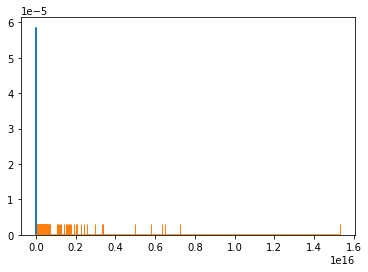

In [ ]:

sns.distplot(df[['rmse_train']], hist=False, rug=True)
sns.distplot(df[['rmse_test']], hist=False, rug=True)

# Coefficients

In [ ]:
linreg.coef_

array([[-2.69109657e+11,  6.49916623e+12, -8.84849905e+13,
         8.62849392e+14, -6.37308656e+15,  3.60677681e+16,
        -1.56240064e+17,  5.13100539e+17, -1.24847962e+18,
         2.13820905e+18, -2.25037788e+18,  6.93216757e+17,
         1.47652719e+18, -1.45386414e+18, -9.10266080e+17,
         1.49673253e+18,  8.85077598e+17, -1.25475038e+18,
        -1.22086900e+18,  7.77329202e+17,  1.54446796e+18,
        -2.56890783e+16, -1.54095665e+18, -8.30314810e+17,
         1.19078786e+18,  1.44871000e+18, -8.27402351e+17,
        -1.82900334e+18,  1.84530372e+18, -4.91727659e+17]])